**Decision Trees**

    1.A) Assume two unit normal distributiuons separated by one standard deviation as the two outputs of a binary classifier

Let's make the mock data!

In [70]:
import numpy as np
import pandas as pd
from scipy.stats import norm
def generate_mock_data(n, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1):
    rng = 42
    classifier_output = np.concatenate([norm(scale = sigma1, loc = mu1).rvs(n, random_state = rng), norm(scale = sigma2, loc = mu2).rvs(n, random_state = rng)], axis = 0)
    truth = np.concatenate([np.repeat(0, n),np.repeat(1, n)], axis = 0)
    truth = truth[classifier_output>=0]
    classifier_output = classifier_output[classifier_output>=0] # cut away data below 0
    truth = truth[classifier_output<=1]
    classifier_output = classifier_output[classifier_output<=1] # cut away data above 1
    return classifier_output, truth
# make mock-labels


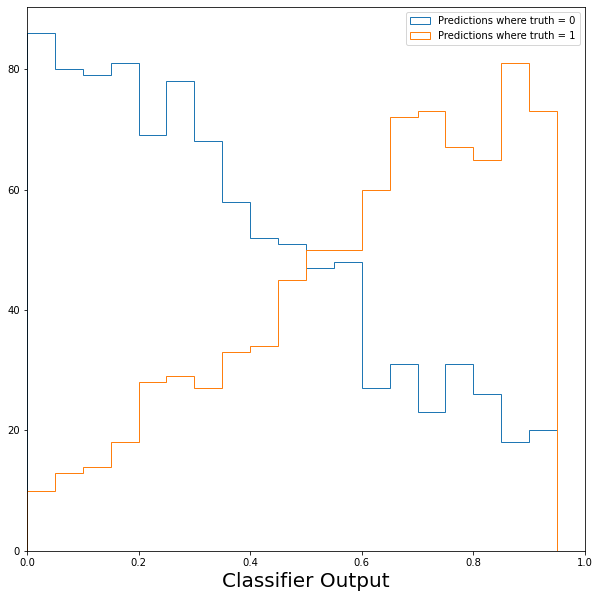

In [71]:
import matplotlib.pyplot as plt
classifier_output, truth = generate_mock_data(n = 2000,mu1 = 0, mu2 = 1, sigma1 = 0.5, sigma2 = 0.5)
fig = plt.figure(figsize = (10,10))
bins = np.arange(0,1, 0.05)
plt.hist(classifier_output[truth == 0], histtype = 'step', bins = bins, label = 'Predictions where truth = 0');
plt.hist(classifier_output[truth == 1], histtype = 'step', bins = bins, label = 'Predictions where truth = 1');
plt.xlabel('Classifier Output', size = 20)
plt.xlim([0,1])
plt.legend()

    1.B) Construct ROC curves by calculating TPRs and FPRs for many threshold values
    1.C) Integrate the area under the curve as a measure for classification performance. Why is this a good metric?
Here I'll solve both problems together. sklearn has inbuilt functionality for this. Let's use that!

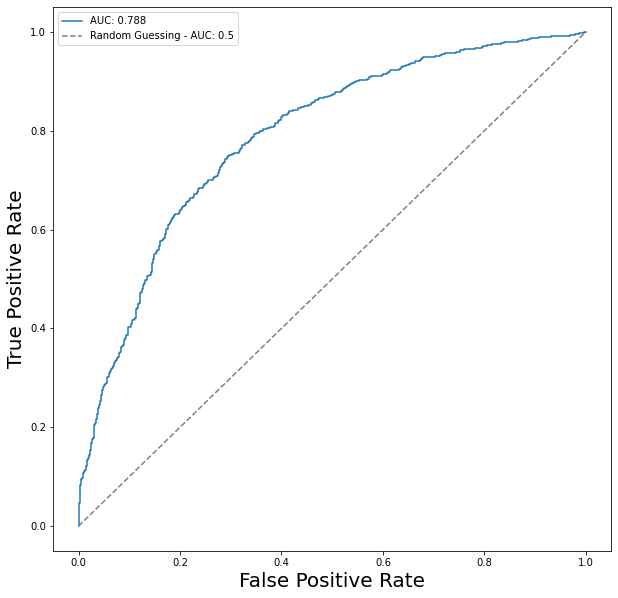

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_score = classifier_output,y_true = truth)
auc_score = auc(fpr,tpr)
fig = plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label = f"AUC: {round(auc_score,3)}")
plt.plot(fpr, fpr, label = f'Random Guessing - AUC: {round(auc(fpr,fpr),3)}', color = 'grey', ls = '--')
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.legend()

An AUC score of 1 indicates perfect seperation capability, whereas an AUC score of 0 indicates reciprocal behavior - ie. the model always predicts the wrong class. Random guessing produces an AUC score of 0.5, as seen in the plot. The AUC score boils down the seperation capability of a classifier into a single number that is independent of the thresholds. You can read more here: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

    2. Loss function in the lecture we discced the binary cross-entropy (BCE) loss for classification. Generalize this loss for multi-label classification. 

The "trick" is to treat multi-label classification as a series of binary classification tasks. This is described here: https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451